# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import os
import time
from random import uniform
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

from scipy.stats import linregress
from citipy import citipy
from pprint import pprint

from api_keys import weather_api_key
from api_keys import g_key

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

# generate random coordinates
while len(cities) < 600:
    x, y = uniform(-180,180), uniform(-90, 90)
    city = citipy.nearest_city(x, y).city_name
    city = city.title()
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set starting count and set for display
count = 0
Set = 1

# Create cities dataframe
cities_df=pd.DataFrame(cities)
cities_df=cities_df.rename(columns={0:"City"})
cities_df["Lat"]= np.nan
cities_df["Lng"]= np.nan
cities_df["Max Temp"]= np.nan
cities_df["Humidity"]= np.nan
cities_df["Cloudiness"]= np.nan
cities_df["Wind Speed"]= np.nan
cities_df["Country"]= np.nan
cities_df["Date"]= np.nan

# Create URL and determine units
url = 'http://api.openweathermap.org/data/2.5/weather?q='

# print initial message
print('Beginning Data Retrieval')
print('------------------------------')


# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
#     time.sleep(0.005)
    merge_url = url + row["City"] + "&appid=" + weather_api_key + "&units=metric"
    city_data = requests.get(merge_url).json()
    try:
        print(f'Processing Record {count+1} of Set {Set} | {row["City"]}')
        # inserting data into corresponding columns
        cities_df.loc[index,"Lat"]=city_data["coord"]["lat"]
        cities_df.loc[index,"Lng"]=city_data["coord"]["lon"]
        cities_df.loc[index,"Max Temp"]=city_data["main"]["temp"]
        cities_df.loc[index,"Humidity"]=city_data["main"]["humidity"]
        cities_df.loc[index,"Cloudiness"]=city_data["clouds"]["all"]
        cities_df.loc[index,"Wind Speed"]=city_data["wind"]["speed"]
        cities_df.loc[index,"Country"]=city_data["sys"]["country"]
        cities_df.loc[index,"Date"]=city_data["dt"]
        count += 1
        if count % 50 == 0:
            Set = Set + 1
            count = 0
    except:
        print(f'City "{row["City"]}" not found. Skipping...')
        cities_df=cities_df.drop(index)

# Print last ending message
print("-----------------------------\nData Retrieval Complete\n-----------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | Port Alfred
Processing Record 2 of Set 1 | Port Elizabeth
Processing Record 3 of Set 1 | Tasiilaq
Processing Record 4 of Set 1 | Cockburn Town
Processing Record 5 of Set 1 | Zemio
Processing Record 6 of Set 1 | Longyearbyen
Processing Record 7 of Set 1 | Ushuaia
Processing Record 8 of Set 1 | Qaanaaq
Processing Record 9 of Set 1 | Bredasdorp
Processing Record 10 of Set 1 | Upernavik
Processing Record 11 of Set 1 | Barentsburg
City "Barentsburg" not found. Skipping...
Processing Record 11 of Set 1 | Izmit
Processing Record 12 of Set 1 | Ballina
Processing Record 13 of Set 1 | Dikson
Processing Record 14 of Set 1 | Kruisfontein
Processing Record 15 of Set 1 | Kentau
Processing Record 16 of Set 1 | Kolondieba
Processing Record 17 of Set 1 | Jamestown
Processing Record 18 of Set 1 | Necochea
Processing Record 19 of Set 1 | Saint-Philippe
Processing Record 20 of Set 1 | Hermanus
Processing Record 21 of Se

Processing Record 16 of Set 4 | Armacao Dos Buzios
City "Armacao Dos Buzios" not found. Skipping...
Processing Record 16 of Set 4 | Umm Kaddadah
Processing Record 17 of Set 4 | Chanasma
Processing Record 18 of Set 4 | Vila Velha
Processing Record 19 of Set 4 | Riyadh
Processing Record 20 of Set 4 | Kletnya
Processing Record 21 of Set 4 | Grand-Lahou
Processing Record 22 of Set 4 | Baie-Comeau
Processing Record 23 of Set 4 | Maceio
Processing Record 24 of Set 4 | Hof
Processing Record 25 of Set 4 | Mongu
Processing Record 26 of Set 4 | Inta
Processing Record 27 of Set 4 | Valdepenas
Processing Record 28 of Set 4 | Apt
Processing Record 29 of Set 4 | Pitimbu
Processing Record 30 of Set 4 | Nioro
Processing Record 31 of Set 4 | Sorland
Processing Record 32 of Set 4 | Batavia
Processing Record 33 of Set 4 | Sakakah
Processing Record 34 of Set 4 | Ituni
City "Ituni" not found. Skipping...
Processing Record 34 of Set 4 | Gopalpur
Processing Record 35 of Set 4 | Mahibadhoo
Processing Record 3

Processing Record 42 of Set 7 | Florence
Processing Record 43 of Set 7 | Awjilah
Processing Record 44 of Set 7 | Wajir
Processing Record 45 of Set 7 | Progreso
Processing Record 46 of Set 7 | Abrau-Dyurso
Processing Record 47 of Set 7 | Viedma
Processing Record 48 of Set 7 | Kazalinsk
City "Kazalinsk" not found. Skipping...
Processing Record 48 of Set 7 | Ruangwa
Processing Record 49 of Set 7 | Erdemli
Processing Record 50 of Set 7 | Muborak
Processing Record 1 of Set 8 | Grand Gaube
Processing Record 2 of Set 8 | Den Helder
Processing Record 3 of Set 8 | San Cristobal
Processing Record 4 of Set 8 | Iquitos
Processing Record 5 of Set 8 | Saint-Joseph
Processing Record 6 of Set 8 | Soderhamn
Processing Record 7 of Set 8 | Hemnesberget
Processing Record 8 of Set 8 | Luau
Processing Record 9 of Set 8 | Moose Factory
Processing Record 10 of Set 8 | Malgrat De Mar
Processing Record 11 of Set 8 | Havoysund
Processing Record 12 of Set 8 | Gornoye Loo
Processing Record 13 of Set 8 | Inirida
Pr

Processing Record 10 of Set 11 | Salinopolis
Processing Record 11 of Set 11 | George Town
Processing Record 12 of Set 11 | Kamyshla
Processing Record 13 of Set 11 | Alpena
Processing Record 14 of Set 11 | Vodnyy
Processing Record 15 of Set 11 | Katakwi
Processing Record 16 of Set 11 | Talara
Processing Record 17 of Set 11 | Vamvakou
Processing Record 18 of Set 11 | Kabwe
Processing Record 19 of Set 11 | Ghanzi
Processing Record 20 of Set 11 | Baracoa
Processing Record 21 of Set 11 | Juba
Processing Record 22 of Set 11 | Upington
Processing Record 23 of Set 11 | Acari
Processing Record 24 of Set 11 | Sutysky
Processing Record 25 of Set 11 | Fort Myers Beach
Processing Record 26 of Set 11 | Petauke
Processing Record 27 of Set 11 | Pozo Colorado
Processing Record 28 of Set 11 | Bridlington
Processing Record 29 of Set 11 | Baghdad
Processing Record 30 of Set 11 | Douentza
Processing Record 31 of Set 11 | Oxapampa
Processing Record 32 of Set 11 | Ugoofaaru
Processing Record 33 of Set 11 | O

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Write dataframe to csv
cities_df.to_csv(r'output_data/Cities_Data.csv',index=False)

# Copy CSV to dataframe
csv_df = pd.read_csv("output_data/Cities_Data.csv")
csv_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,18.73,85.0,1.0,5.83,ZA,1.602781e+09
1,Port Elizabeth,-33.92,25.57,17.00,93.0,40.0,6.20,ZA,1.602782e+09
2,Tasiilaq,65.61,-37.64,5.00,75.0,75.0,3.10,GL,1.602782e+09
3,Cockburn Town,21.46,-71.14,28.44,78.0,5.0,5.37,TC,1.602782e+09
4,Zemio,5.03,25.14,23.63,87.0,33.0,0.77,CF,1.602782e+09


In [5]:
# display summary table
csv_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.901117,2.810486,19.779063,64.286486,46.025225,3.759946,1.602782e+09
std,30.776332,56.238581,9.889274,22.167456,35.849254,2.422423,2.302544e+02
min,-54.800000,-121.420000,-4.000000,6.000000,0.000000,0.260000,1.602781e+09
25%,-3.975000,-53.080000,11.600000,50.000000,11.500000,2.000000,1.602782e+09
50%,21.230000,13.500000,22.000000,69.000000,40.000000,3.180000,1.602782e+09
75%,45.770000,43.895000,27.595000,81.000000,75.000000,5.100000,1.602782e+09
max,78.220000,153.570000,39.270000,100.000000,100.000000,15.400000,1.602782e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humid100 = csv_df[csv_df.Humidity > 100].index
humid100
# no city with humidity > 100%

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = csv_df.drop(csv_df.index[humid100], inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,18.73,85.0,1.0,5.83,ZA,1.602781e+09
1,Port Elizabeth,-33.92,25.57,17.00,93.0,40.0,6.20,ZA,1.602782e+09
2,Tasiilaq,65.61,-37.64,5.00,75.0,75.0,3.10,GL,1.602782e+09
3,Cockburn Town,21.46,-71.14,28.44,78.0,5.0,5.37,TC,1.602782e+09
4,Zemio,5.03,25.14,23.63,87.0,33.0,0.77,CF,1.602782e+09
...,...,...,...,...,...,...,...,...,...
550,Gravdal,68.12,13.50,6.00,81.0,75.0,5.10,NO,1.602782e+09
551,Camacha,33.08,-16.33,22.00,60.0,75.0,5.10,PT,1.602782e+09
552,Goksun,38.02,36.50,25.00,53.0,0.0,8.20,TR,1.602782e+09
553,Mustafakemalpasa,40.04,28.41,21.54,68.0,0.0,3.10,TR,1.602782e+09


In [8]:
# confirm the maximum humidity in the clean_city_data
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.901117,2.810486,19.779063,64.286486,46.025225,3.759946,1.602782e+09
std,30.776332,56.238581,9.889274,22.167456,35.849254,2.422423,2.302544e+02
min,-54.800000,-121.420000,-4.000000,6.000000,0.000000,0.260000,1.602781e+09
25%,-3.975000,-53.080000,11.600000,50.000000,11.500000,2.000000,1.602782e+09
50%,21.230000,13.500000,22.000000,69.000000,40.000000,3.180000,1.602782e+09
75%,45.770000,43.895000,27.595000,81.000000,75.000000,5.100000,1.602782e+09
max,78.220000,153.570000,39.270000,100.000000,100.000000,15.400000,1.602782e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

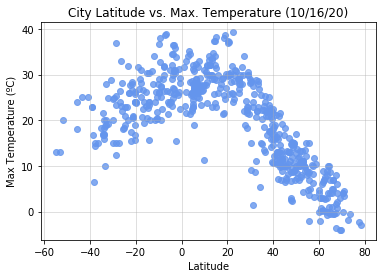

In [9]:
# capture the date that the script would run
date=time.strftime('%m/%d/%y')

plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], color = "cornflowerblue", marker = "o", alpha = ".8")
plt.grid(b=True, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (ºC)')
plt.title(f"City Latitude vs. Max. Temperature ({date})")

plt.savefig('output_data/Fig 1 - Lat_vs_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

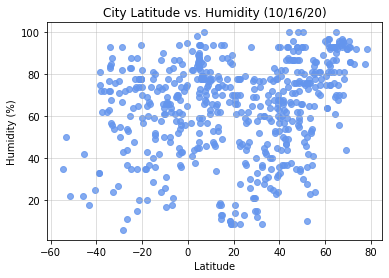

In [10]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color = "cornflowerblue", marker = "o", alpha = ".8")
plt.grid(b=True, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")

plt.savefig('output_data/Fig 2 - Lat_vs_Hum.png')
plt.show()

## Latitude vs. Cloudiness Plot

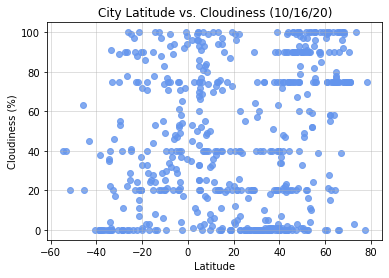

In [11]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color = "cornflowerblue", marker = "o", alpha = ".8")
plt.grid(b=True, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")

plt.savefig('output_data/Fig 3 - Lat_vs_Cld.png')
plt.show()

## Latitude vs. Wind Speed Plot

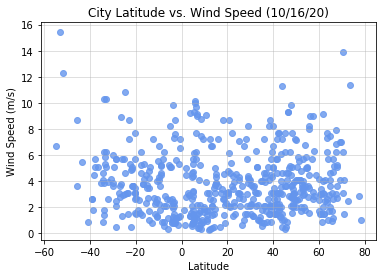

In [12]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color = "cornflowerblue", marker = "o", alpha = ".8")
plt.grid(b=True, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")

plt.savefig('output_data/Fig 4 - Lat_vs_Wnd.png')
plt.show()

## Linear Regression

In [13]:
# split dataframe into northern and southern hemisphere
n_csv = clean_city_data[clean_city_data["Lat"]>=0]
s_csv = clean_city_data[clean_city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7635236237294915


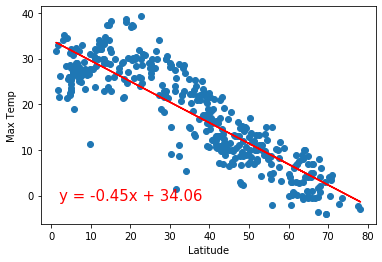

In [14]:
x_values = n_csv["Lat"]
y_values = n_csv["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,-1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.33017977148405414


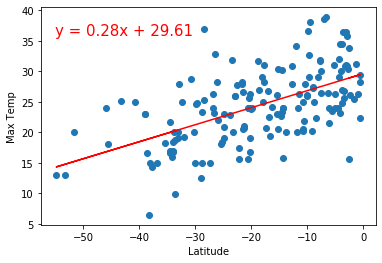

In [15]:
x_values = s_csv["Lat"]
y_values = s_csv["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03952226719079972


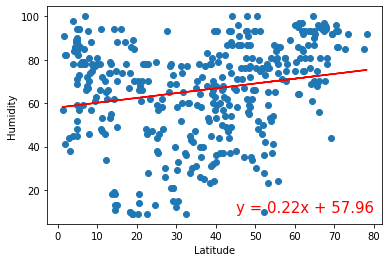

In [16]:
x_values = n_csv["Lat"]
y_values = n_csv["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01778696660942616


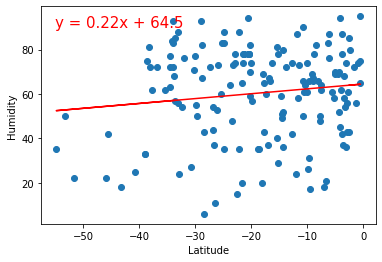

In [17]:
x_values = s_csv["Lat"]
y_values = s_csv["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05187803382382598


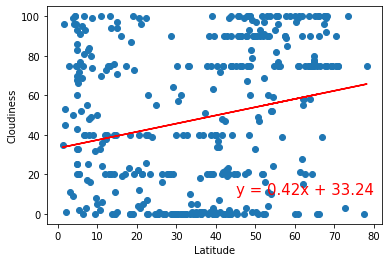

In [18]:
x_values = n_csv["Lat"]
y_values = n_csv["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07411525924799414


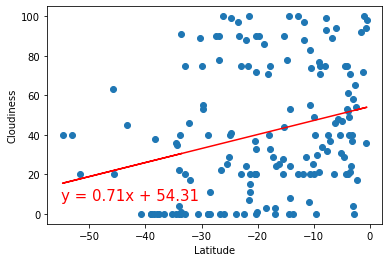

In [19]:
x_values = s_csv["Lat"]
y_values = s_csv["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01691984479617957


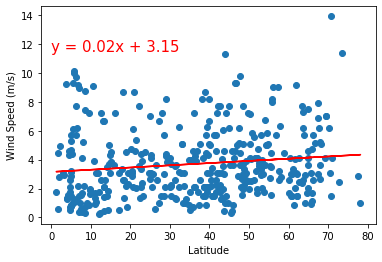

In [20]:
x_values = n_csv["Lat"]
y_values = n_csv["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,11.5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09841258396571592


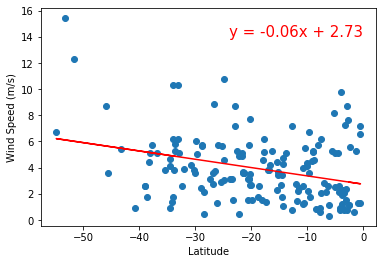

In [21]:
x_values = s_csv["Lat"]
y_values = s_csv["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-24,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"The r-value is: {rvalue**2}")
plt.show()